In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

1. Histogram Processing
1.1 Histogram Equalization
Histogram equalization enhances the contrast of an image by redistributing the pixel intensity values.

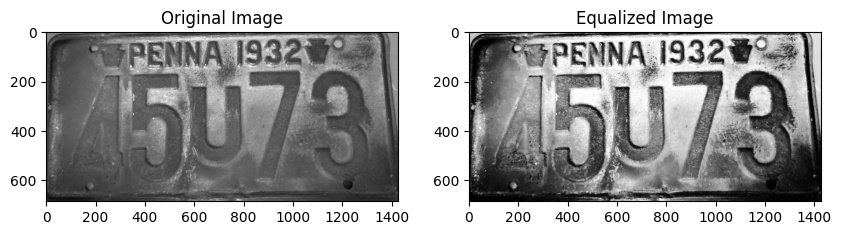

In [2]:


# Load image in grayscale
img = cv2.imread('s-l1600.jpg', 0)

# Perform histogram equalization
equalized_img = cv2.equalizeHist(img)

# Display original and equalized image
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(equalized_img, cmap='gray'), plt.title('Equalized Image')
plt.show()


1.2 Histogram Matching
Histogram matching adjusts the pixel values of an image to match the histogram of a reference image.

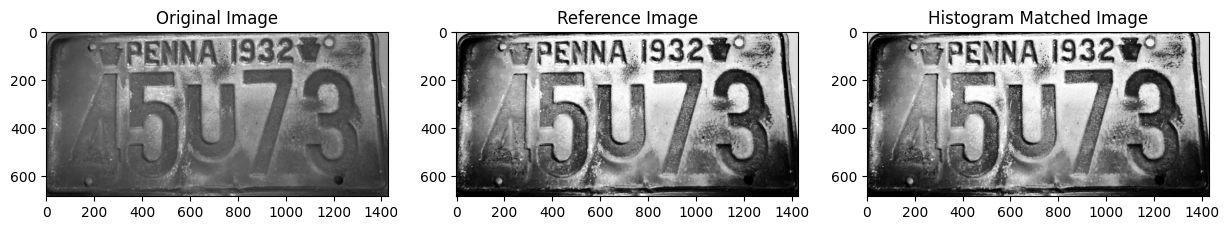

In [3]:
from skimage import exposure

# Load target and reference images
img = cv2.imread('s-l1600.jpg', 0)
equalized_img

# Perform histogram matching
matched_img = exposure.match_histograms(img, equalized_img, channel_axis=None)

# Display original, reference, and matched images
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(equalized_img, cmap='gray'), plt.title('Reference Image')
plt.subplot(1, 3, 3), plt.imshow(matched_img, cmap='gray'), plt.title('Histogram Matched Image')
plt.show()



1.3 Adjusting Brightness and Contrast
You can adjust the brightness and contrast using linear transformations on pixel values.

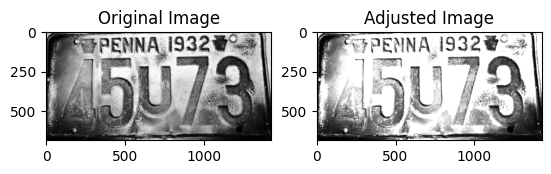

In [4]:
def adjust_brightness_contrast(img, brightness=0, contrast=0):
    return cv2.convertScaleAbs(img, alpha=1 + contrast / 100, beta=brightness)

# Load image
img = matched_img

# Adjust brightness and contrast
adjusted_img = adjust_brightness_contrast(img, brightness=30, contrast=50)

# Display
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(adjusted_img, cmap='gray'), plt.title('Adjusted Image')
plt.show()


2. Spatial Filtering
2.1 Smoothing Filters (Mean and Median)
These filters help reduce noise and smooth the image.

Mean Filter (Averaging)

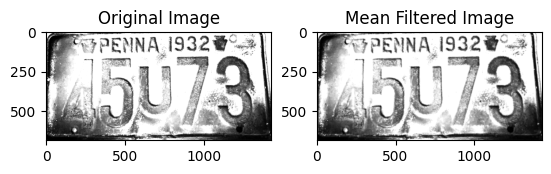

In [5]:
# Mean filter (using cv2.blur)
mean_filtered_img = cv2.blur(adjusted_img, (5,5))

# Display
plt.subplot(1, 2, 1), plt.imshow(adjusted_img, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(mean_filtered_img, cmap='gray'), plt.title('Mean Filtered Image')
plt.show()


Median Filter

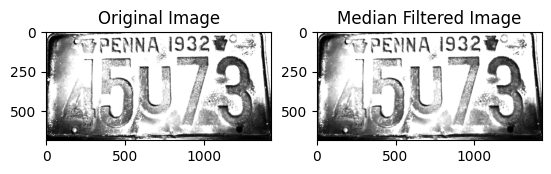

In [6]:
# Median filter
median_filtered_img = cv2.medianBlur(adjusted_img, 5)

# Display
plt.subplot(1, 2, 1), plt.imshow(adjusted_img, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(median_filtered_img, cmap='gray'), plt.title('Median Filtered Image')
plt.show()


2.2 Sharpening Filters (Laplacian and High-pass)
These filters help enhance the edges in the image.

Laplacian Filter

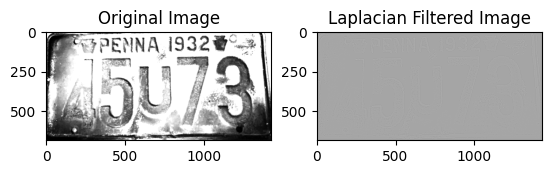

In [7]:
# Laplacian filter
laplacian_img = cv2.Laplacian(median_filtered_img, cv2.CV_64F)

# Display
plt.subplot(1, 2, 1), plt.imshow(median_filtered_img, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(laplacian_img, cmap='gray'), plt.title('Laplacian Filtered Image')
plt.show()


High-pass Filter

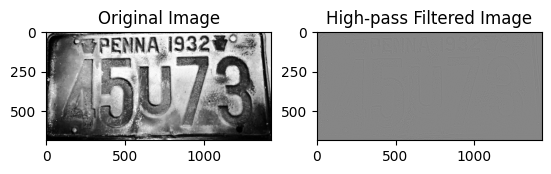

In [8]:
# High-pass filter kernel
kernel = np.array([[-1, -1, -1], 
                   [-1, 8, -1], 
                   [-1, -1, -1]])

high_pass_img = cv2.filter2D(img, -1, kernel)

# Display
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(high_pass_img, cmap='gray'), plt.title('High-pass Filtered Image')
plt.show()


3. Frequency Domain Filtering
3.1 Low-pass, High-pass, and Band-pass Filters in Fourier Domain
We can use the Fourier transform to filter images in the frequency domain.

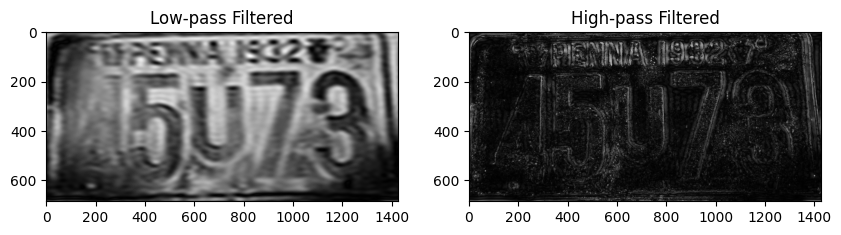

In [9]:
import numpy as np
from numpy.fft import fft2, ifft2, fftshift

# Perform Fourier transform
f_transform = fftshift(fft2(img))

# Create masks
def create_mask(rows, cols, pass_type='low', radius=30):
    mask = np.zeros((rows, cols), np.uint8)
    crow, ccol = rows//2, cols//2
    if pass_type == 'low':
        mask[crow-radius:crow+radius, ccol-radius:ccol+radius] = 1
    elif pass_type == 'high':
        mask = np.ones((rows, cols), np.uint8)
        mask[crow-radius:crow+radius, ccol-radius:ccol+radius] = 0
    return mask

rows, cols = img.shape
low_pass_mask = create_mask(rows, cols, pass_type='low', radius=30)
high_pass_mask = create_mask(rows, cols, pass_type='high', radius=30)

# Apply mask and perform inverse Fourier transform
low_pass_filtered = np.abs(ifft2(fftshift(f_transform * low_pass_mask)))
high_pass_filtered = np.abs(ifft2(fftshift(f_transform * high_pass_mask)))

# Display results
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1), plt.imshow(low_pass_filtered, cmap='gray'), plt.title('Low-pass Filtered')
plt.subplot(1, 2, 2), plt.imshow(high_pass_filtered, cmap='gray'), plt.title('High-pass Filtered')
plt.show()
